# FAA Project - Part Three

## Load in packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_column', None)
%matplotlib Inline

## Load in Dataset

In [2]:
df = pd.read_csv('faa_cleaned_numerical_data.csv', index_col = 0)
df = df.drop(columns = ['I', 'ENROLID', 'NDCNUM', 'YEAR_x', 'YEAR_y'])
df.head()

,AGE_x,SEX,AGE_y,Infectious And Parastic Disease(A & B),Neoplasms(C),Neoplasms Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Connective Tissue(L),musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
0,54,2,55,0,0,0,3,1,2,0,0,0,5,0,3,0,0,0,0,4,0,0,0,2
111,50,1,51,6,0,3,5,1,0,0,1,1,6,0,0,0,0,0,0,5,0,0,0,1
145,54,2,55,0,0,0,2,0,5,0,1,1,0,0,0,0,0,0,0,12,1,0,0,2
239,62,1,63,2,0,1,5,0,0,0,1,3,0,0,0,5,0,0,0,5,0,1,0,0
262,13,2,14,0,0,0,7,0,0,0,0,1,1,0,0,0,0,0,0,6,0,0,0,2


In [3]:
df.shape

(5016, 24)

## Set Input Variables and Target Variable

In [73]:
X = df.drop(columns = ['Circulatory System(I)'], axis = 1).values
y = df['Circulatory System(I)']

## Import Sklearn Packages

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Split Training and Testing Data

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [76]:
X_train

array([[46,  1, 47, ...,  0,  0,  1],
       [61,  1, 62, ...,  0,  0,  1],
       [51,  2, 52, ...,  0,  0,  5],
       ...,
       [19,  1, 20, ...,  0,  0,  6],
       [23,  1, 24, ...,  0,  0,  5],
       [49,  1, 50, ...,  0,  0,  4]])

## Preprocessing, Scaling the data to be normalized

In [77]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

## Neural Network Model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Basic Model with out early stop and dropout

In [10]:
model = Sequential()

model.add(Dense(23, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

# binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [11]:
model.fit(x=X_train, y=y_train, epochs = 300 , validation_data=(X_test, y_test))

Epoch 1/300
126/126 [==============================] - 2s 3ms/step - loss: 0.6359 - val_loss: 18.1190
Epoch 2/300
126/126 [==============================] - 0s 814us/step - loss: 0.5805 - val_loss: 25.2980
Epoch 3/300
126/126 [==============================] - 0s 793us/step - loss: 0.5471 - val_loss: 30.7255
Epoch 4/300
126/126 [==============================] - 0s 795us/step - loss: 0.5324 - val_loss: 32.2479
Epoch 5/300
126/126 [==============================] - 0s 789us/step - loss: 0.5271 - val_loss: 34.2869
Epoch 6/300
126/126 [==============================] - 0s 782us/step - loss: 0.5247 - val_loss: 34.6966
Epoch 7/300
126/126 [==============================] - 0s 787us/step - loss: 0.5214 - val_loss: 34.4971
Epoch 8/300
126/126 [==============================] - 0s 786us/step - loss: 0.5201 - val_loss: 34.0839
Epoch 9/300
126/126 [==============================] - 0s 788us/step - loss: 0.5188 - val_loss: 34.5764
Epoch 10/300
126/126 [==============================] - 0s 792us/s

126/126 [==============================] - 0s 770us/step - loss: 0.4370 - val_loss: 21.1240
Epoch 157/300
126/126 [==============================] - 0s 756us/step - loss: 0.4372 - val_loss: 20.4439
Epoch 158/300
126/126 [==============================] - 0s 765us/step - loss: 0.4359 - val_loss: 18.1786
Epoch 159/300
126/126 [==============================] - 0s 759us/step - loss: 0.4365 - val_loss: 20.1835
Epoch 160/300
126/126 [==============================] - 0s 767us/step - loss: 0.4379 - val_loss: 23.0787
Epoch 161/300
126/126 [==============================] - 0s 756us/step - loss: 0.4349 - val_loss: 19.4355
Epoch 162/300
126/126 [==============================] - 0s 761us/step - loss: 0.4359 - val_loss: 19.0124
Epoch 163/300
126/126 [==============================] - 0s 749us/step - loss: 0.4353 - val_loss: 17.7254
Epoch 164/300
126/126 [==============================] - 0s 751us/step - loss: 0.4356 - val_loss: 19.4030
Epoch 165/300
126/126 [==============================] - 0s 

### Visualize the Model Prediction

<AxesSubplot:>

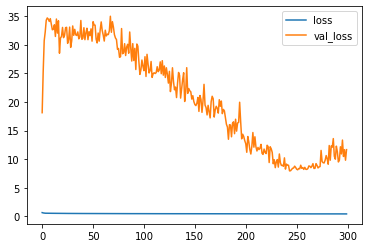

In [12]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Evaluate the Model

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [14]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [15]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57       400
           1       0.00      0.00      0.00       604

    accuracy                           0.40      1004
   macro avg       0.20      0.50      0.28      1004
weighted avg       0.16      0.40      0.23      1004



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print(confusion_matrix(y_test, classes_x))

[[400   0]
 [604   0]]


### Model with early stop and drop out

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience=25)

In [19]:
model = Sequential()

model.add(Dense(23, activation = 'relu'))
model.add(Dropout(0.5)) # 50% of neruals randomly turn off

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

# binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

### Fit the model

In [20]:
model.fit(x=X_train, y=y_train, epochs = 500 , validation_data=(X_test, y_test),
         callbacks = [early_stop])

Epoch 1/500
126/126 [==============================] - 1s 1ms/step - loss: 0.6677 - val_loss: 9.9330
Epoch 2/500
126/126 [==============================] - 0s 808us/step - loss: 0.6395 - val_loss: 14.0305
Epoch 3/500
126/126 [==============================] - 0s 811us/step - loss: 0.6156 - val_loss: 19.1380
Epoch 4/500
126/126 [==============================] - 0s 807us/step - loss: 0.6023 - val_loss: 21.4198
Epoch 5/500
126/126 [==============================] - 0s 804us/step - loss: 0.5875 - val_loss: 23.2462
Epoch 6/500
126/126 [==============================] - 0s 828us/step - loss: 0.5815 - val_loss: 24.9534
Epoch 7/500
126/126 [==============================] - 0s 798us/step - loss: 0.5791 - val_loss: 24.6267
Epoch 8/500
126/126 [==============================] - 0s 816us/step - loss: 0.5687 - val_loss: 25.8281
Epoch 9/500
126/126 [==============================] - 0s 809us/step - loss: 0.5743 - val_loss: 26.9267
Epoch 10/500
126/126 [==============================] - 0s 795us/st

<AxesSubplot:>

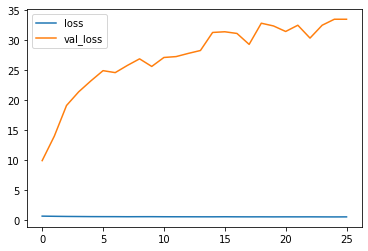

In [21]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Evaluate the model

In [22]:
predict_x=model.predict(X_test) 
classes=np.argmax(predict_x,axis=1)

In [23]:
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57       400
           1       0.00      0.00      0.00       604

    accuracy                           0.40      1004
   macro avg       0.20      0.50      0.28      1004
weighted avg       0.16      0.40      0.23      1004



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(confusion_matrix(y_test, classes))

[[400   0]
 [604   0]]


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)

In [27]:
print(confusion_matrix(y_test, prediction))
print('\n')
print('Classification Summary--->')
print(classification_report(y_test, prediction))

[[333  67]
 [530  74]]


Classification Summary--->
              precision    recall  f1-score   support

           0       0.39      0.83      0.53       400
           1       0.52      0.12      0.20       604

    accuracy                           0.41      1004
   macro avg       0.46      0.48      0.36      1004
weighted avg       0.47      0.41      0.33      1004



## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [81]:
rfc_pred = rfc.predict(X_test)

In [82]:
print('Confusion Matrix--->')
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print('Classification Summary--->')
print(classification_report(y_test, rfc_pred))

Confusion Matrix--->
[[352  28]
 [598  26]]


Classification Summary--->
              precision    recall  f1-score   support

           0       0.37      0.93      0.53       380
           1       0.48      0.04      0.08       624

    accuracy                           0.38      1004
   macro avg       0.43      0.48      0.30      1004
weighted avg       0.44      0.38      0.25      1004



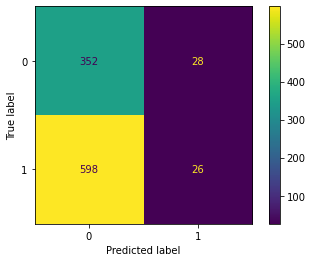

In [84]:
plot_confusion_matrix(rfc, X_test, y_test)

### Random Forest with Cross_validation

In [32]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}
    

cv = GridSearchCV(rfc, parameters, cv = 5)

cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=600),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [33]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [34]:
display(cv)

Best parameters are: {'max_depth': 32, 'n_estimators': 250}


0.737 + or -0.012 for the {'max_depth': 2, 'n_estimators': 5}
0.736 + or -0.016 for the {'max_depth': 2, 'n_estimators': 10}
0.741 + or -0.017 for the {'max_depth': 2, 'n_estimators': 50}
0.74 + or -0.015 for the {'max_depth': 2, 'n_estimators': 100}
0.741 + or -0.016 for the {'max_depth': 2, 'n_estimators': 250}
0.747 + or -0.016 for the {'max_depth': 4, 'n_estimators': 5}
0.743 + or -0.02 for the {'max_depth': 4, 'n_estimators': 10}
0.746 + or -0.014 for the {'max_depth': 4, 'n_estimators': 50}
0.747 + or -0.015 for the {'max_depth': 4, 'n_estimators': 100}
0.745 + or -0.015 for the {'max_depth': 4, 'n_estimators': 250}
0.746 + or -0.017 for the {'max_depth': 8, 'n_estimators': 5}
0.751 + or -0.017 for the {'max_depth': 8, 'n_estimators': 10}
0.757 + or -0.018 for the {'max_depth': 8, 'n_estimators': 50}
0.756 + or -0.019 for the {'max_depth': 8, 'n_estimators': 100}
0.756 + or -0.018 for the {'max_depth': 8, 'n_estimators

In [35]:
rf = RandomForestClassifier(n_estimators = 250, max_depth = 16) # n_estimators = 5
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[347  53]
 [508  96]]
              precision    recall  f1-score   support

           0       0.41      0.87      0.55       400
           1       0.64      0.16      0.25       604

    accuracy                           0.44      1004
   macro avg       0.53      0.51      0.40      1004
weighted avg       0.55      0.44      0.37      1004



### Building Models with SMOTE Sampling

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [37]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

<AxesSubplot:>

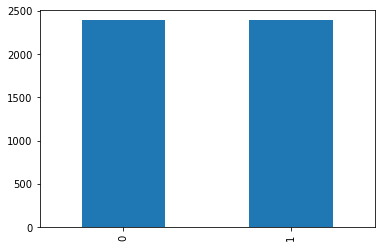

In [38]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

### Decision Tree

In [39]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X_train_new, y_train_new)
predtion = dtree1.predict(X_test)

In [40]:
confusion_matrix(y_test, predtion)
print(classification_report(y_test, predtion))

              precision    recall  f1-score   support

           0       0.35      0.65      0.46       400
           1       0.48      0.22      0.30       604

    accuracy                           0.39      1004
   macro avg       0.42      0.43      0.38      1004
weighted avg       0.43      0.39      0.36      1004



In [41]:
confusion_matrix(y_test, predtion)

array([[260, 140],
       [473, 131]])

In [42]:
train_pred_sm = dtree1.predict(X_train_new)
test_pred_sm = dtree1.predict(X_test)

In [43]:
print(accuracy_score(test_pred_sm, y_test))
confusion_matrix(y_test, test_pred_sm)

0.3894422310756972


array([[260, 140],
       [473, 131]])

In [44]:
print(pd.crosstab(y_test.ravel(), test_pred_sm.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))


Predicted    0    1   All
True                     
0          260  140   400
1          473  131   604
All        733  271  1004


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [48]:
predictions = logmodel.predict(X_test)

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       400
           1       0.60      1.00      0.75       604

    accuracy                           0.60      1004
   macro avg       0.80      0.50      0.38      1004
weighted avg       0.76      0.60      0.45      1004



In [51]:
confusion_matrix(y_test, predictions)

array([[  1, 399],
       [  0, 604]])

In [57]:
logmodel1 = LogisticRegression()


In [60]:
logmodel1.fit(X_train_new, y_train_new)

LogisticRegression()

In [61]:
prediction = logmodel1.predict(X_test)

In [63]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.60      1.00      0.75       604

    accuracy                           0.60      1004
   macro avg       0.30      0.50      0.38      1004
weighted avg       0.36      0.60      0.45      1004



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
confusion_matrix(y_test, prediction)

array([[  0, 400],
       [  0, 604]])

In [65]:
print(accuracy_score(prediction, y_test))

0.601593625498008


In [85]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [86]:
pipeline = make_pipeline(RobustScaler()) # creating pipeline for model building

LR = make_pipeline(pipeline, LogisticRegression(random_state=0)) # LogisticRegression pipeline
DT = make_pipeline(pipeline, DecisionTreeClassifier(random_state=0)) # DecisionTree Classifier pipeline
RF = make_pipeline(pipeline, RandomForestClassifier(random_state=0)) # RandomForest Classifier pipeline
AC = make_pipeline(pipeline, AdaBoostClassifier(random_state=0)) # Adaboost Classifier pipeline
NB = make_pipeline(pipeline, GaussianNB()) # Naive bayes pipeline
KN = make_pipeline(pipeline, KNeighborsClassifier()) # KNeighbor pipeline
SV = make_pipeline(pipeline, SVC(random_state=0)) # Support vector pipeline

In [87]:
# creating model_dict
model_dictionary = {
    'Logistic_Regression':LR,
    'DecisionTree_Classifier':DT,
    'RandomForest_classifier':RF,
    'Adaboost_Classifier':AC,
    'Naivebayes_Classifier':NB,
    'KNeighbors_classifier':KN,
    'Support_Vector':SV
}

In [88]:
# define a function to fit the model and return it's accuracy, classification report and confusion matrix
def model_fitting(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('The accuracy score of the model is: {}%'.format(accuracy_score(y_test, y_pred)* 100))
    print('-----'*20)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [89]:
for name, model in model_dictionary.items():
    print('---'*10)
    print(name)
    model_fitting(model)

------------------------------
Logistic_Regression
The accuracy score of the model is: 62.15139442231076%
----------------------------------------------------------------------------------------------------
[[  0 380]
 [  0 624]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       380
           1       0.62      1.00      0.77       624

    accuracy                           0.62      1004
   macro avg       0.31      0.50      0.38      1004
weighted avg       0.39      0.62      0.48      1004

------------------------------
DecisionTree_Classifier
The accuracy score of the model is: 52.589641434262944%
----------------------------------------------------------------------------------------------------
[[240 140]
 [336 288]]
              precision    recall  f1-score   support

           0       0.42      0.63      0.50       380
           1       0.67      0.46      0.55       624

    accuracy                           0.53 

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-define

The accuracy score of the model is: 37.45019920318725%
----------------------------------------------------------------------------------------------------
[[318  62]
 [566  58]]
              precision    recall  f1-score   support

           0       0.36      0.84      0.50       380
           1       0.48      0.09      0.16       624

    accuracy                           0.37      1004
   macro avg       0.42      0.46      0.33      1004
weighted avg       0.44      0.37      0.29      1004

------------------------------
Adaboost_Classifier
The accuracy score of the model is: 45.41832669322709%
----------------------------------------------------------------------------------------------------
[[245 135]
 [413 211]]
              precision    recall  f1-score   support

           0       0.37      0.64      0.47       380
           1       0.61      0.34      0.44       624

    accuracy                           0.45      1004
   macro avg       0.49      0.49      0.45   

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
from sklearn.metrics import f1_score, precision_score
from sklearn import metrics

In [95]:
metrics.f1_score(y_test, prediction, labels=np.unique(prediction))

0.7665847665847666

In [96]:
metrics.precision_score(y_test, prediction, labels=np.unique(prediction))

0.6215139442231076

In [97]:
from collections import Counter
Counter(y_train)
Counter(y_test)


Counter({1: 624, 0: 380})

# Testing

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
scaler.fit(df)

StandardScaler()

In [139]:
scaled_data = scaler.transform(df)

In [140]:
# PCA
from sklearn.decomposition import PCA

In [141]:
pca = PCA(n_components=2)

In [142]:
pca.fit(scaled_data)

PCA(n_components=2)

In [143]:
x_pca = pca.transform(scaled_data)

In [144]:
scaled_data.shape

(5016, 24)

In [145]:
x_pca.shape

(5016, 2)

Text(0, 0.5, 'Second Principle Component')

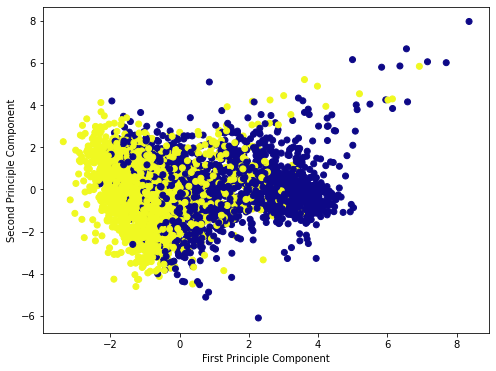

In [149]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['Circulatory System(I)'], cmap='plasma')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [150]:
pca.components_

array([[-0.50145362,  0.06802024, -0.50150125, -0.14422589, -0.07289539,
        -0.13709092, -0.26592162,  0.29098559, -0.02265612,  0.01626984,
        -0.35276984, -0.10750128, -0.10162102, -0.09051642, -0.09281997,
        -0.16498653,  0.18327943,  0.12347517,  0.14312459, -0.11717493,
         0.02108244, -0.08849576,  0.02928542,  0.09378372],
       [-0.18817556,  0.03411134, -0.18861847,  0.33300114,  0.0995184 ,
         0.17714273,  0.04561747, -0.10735533, -0.09062995,  0.06860929,
        -0.03414505,  0.30471307,  0.15305117, -0.06238763, -0.41426266,
         0.17659003, -0.05542944,  0.1843683 ,  0.21012174,  0.40057329,
        -0.2726773 ,  0.1757791 , -0.19235419, -0.20271444]])

In [151]:
df_comp = pd.DataFrame(pca.components_, columns = df.columns)

<AxesSubplot:>

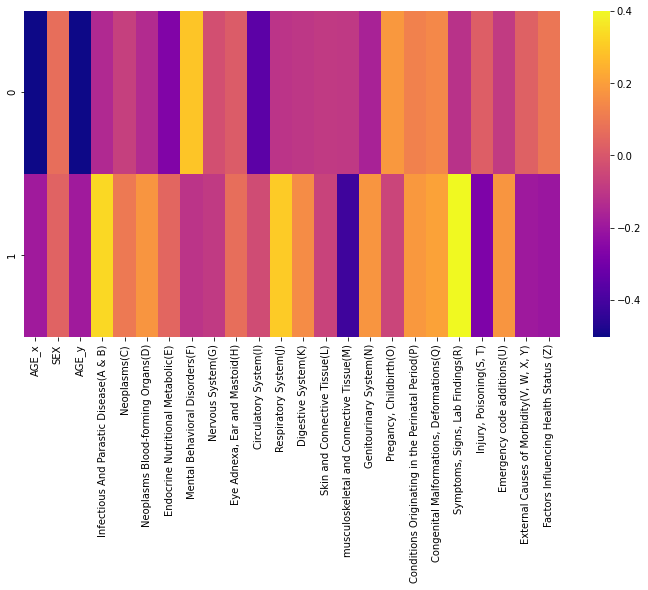

In [154]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_comp, cmap = 'plasma')

In [159]:
scaler = StandardScaler()

In [162]:
scaler.fit(X_train)

StandardScaler()

In [163]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
pca = PCA(n_components=2)

In [187]:
pca.fit(X_train)

PCA(n_components=2)

In [188]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [199]:
log = SVC()

In [200]:
log.fit(X_train, y_train)

SVC()

In [201]:
pred = log.predict(X_test)

In [202]:
confusion_matrix(y_test, pred)

array([[529,   0],
       [475,   0]])

In [203]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       529
           1       0.00      0.00      0.00       475

    accuracy                           0.53      1004
   macro avg       0.26      0.50      0.35      1004
weighted avg       0.28      0.53      0.36      1004



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
